In [17]:
import random
import os

def generate_random_bits(num_bits, file_path):
    # Generate random bits
    bits = ''.join(str(random.randint(0, 1)) for _ in range(num_bits))
    
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Write bits to the file
    with open(file_path, 'w') as file:
        file.write(bits)

# Define the number of bits and file path
num_bits = 6000000  # Change this to the number of bits you need
file_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'

# Call the function
generate_random_bits(num_bits, file_path)


Image dimensions: (1024, 1024, 3)
Total pixels: 1048576
Maximum bits capacity: 8388608 bits


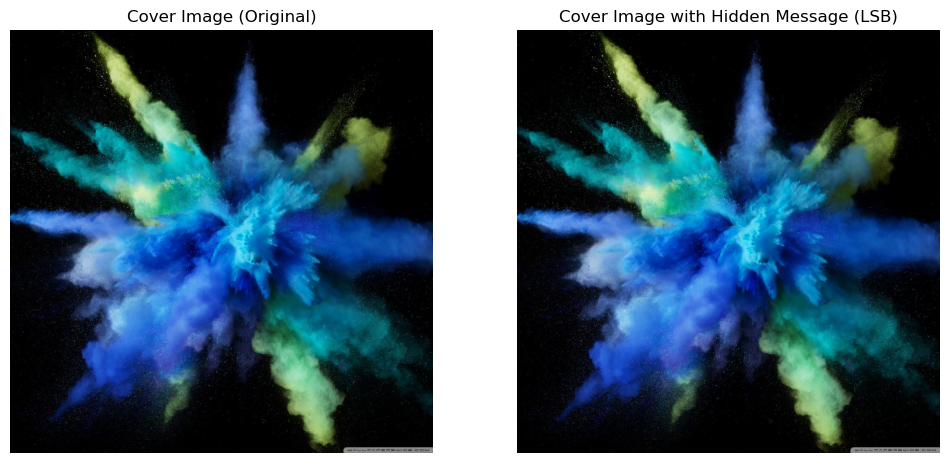

LSB Method:
Extracted Message: 111110001100111110111110111010011010011100101110101101111000011100111010101011011101001001001001000011100100101001101010001100011000100001100001110110110000111011000001010000101010000110000001011110011001011001001110111000101001100111011110001101001001111010001011011010000101101010010010111100011001110011111001111010000010111110111111001011110110111001111110001101110010011010000101001101111011010011001011010010010101110010010010110011100110011010001000111001100001011011001010001111111001011111011001001011000001010110000100011100110001011111100010110010001001001111100011110111011010110101011000001011111001000000100011100011011010111011001010101001110110101001110110010111000000000100111101101111011100100001111000001101001011101100111101101101100100010001011101000111111001011101011111100101011011111111000001011101011100111101001011101011111011101110001010010100010001100100011110111111100101011010001111001000001000011011100110111111001001111110110010110010011

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to hide message in LSB of image pixels
def hide_message_LSB(image, binary_message):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Embed message into LSB of each color channel
    for i in range(len(binary_message)):
        bit = int(binary_message[i])
        flattened_image[i][-1] = (flattened_image[i][-1] & 254) | bit
    
    # Reshape the image back to original shape
    modified_image = flattened_image.reshape(image.shape)

    return modified_image

# Function to extract message hidden in LSB of image pixels
def extract_message_LSB(image, message_length):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Extract LSB from each color channel
    extracted_message = []
    for i in range(message_length):
        bit = flattened_image[i][-1] & 1
        extracted_message.append(str(bit))
    
    # Join the bits into a single binary string
    binary_message = ''.join(extracted_message)

    return binary_message

# Function to write binary message to a text file
def write_binary_message_to_file(binary_message, file_path):
    with open(file_path, 'w') as file:
        file.write(binary_message)

# Function to calculate SNR between two images
def calculate_snr(original_image, modified_image):
    # Convert images to float64 to avoid overflow during computations
    original_image = original_image.astype(np.float64)
    modified_image = modified_image.astype(np.float64)
    
    # Calculate signal power
    signal_power = np.sum(original_image ** 2)
    
    # Calculate noise power as the sum of squared differences
    noise = original_image - modified_image
    noise_power = np.sum(noise ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Load cover image (RGB)
cover_image_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\cover_image\3.jpg'
cover_image = cv2.imread(cover_image_path)
cover_image = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)

# Load secret message from text file containing binary data
secret_text_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'
with open(secret_text_path, 'r') as file:
    secret_message = file.read().strip()

# Calculate maximum capacity for LSB method
total_pixels = cover_image.shape[0] * cover_image.shape[1]
bits_per_pixel = 8  # 3 bits per pixel (LSB in R, G, B channels)
max_bits_capacity = total_pixels * bits_per_pixel

print(f"Image dimensions: {cover_image.shape}")
print(f"Total pixels: {total_pixels}")
print(f"Maximum bits capacity: {max_bits_capacity} bits")

# Check if the secret message fits in the image
if len(secret_message) > max_bits_capacity:
    raise ValueError("The secret message is too long to fit in the given image.")

# Hide message in cover image using LSB substitution
modified_image_LSB = hide_message_LSB(cover_image.copy(), secret_message)

# Extract hidden message from modified image
extracted_message_LSB = extract_message_LSB(modified_image_LSB, len(secret_message))

# Calculate information capacity per pixel for LSB
info_capacity_LSB = len(secret_message) / total_pixels

# Display results for LSB
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Cover Image (Original)")
plt.imshow(cover_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Cover Image with Hidden Message (LSB)")
plt.imshow(modified_image_LSB)
plt.axis('off')

plt.show()

print("LSB Method:")
print(f"Extracted Message: {extracted_message_LSB}")
print(f"Information Capacity per Pixel: {info_capacity_LSB:.4f} bits/pixel")

# Write extracted binary message to a text file
extracted_message_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt'
write_binary_message_to_file(extracted_message_LSB, extracted_message_path)

# Calculate and print SNR for LSB
snr_LSB = calculate_snr(cover_image.astype(np.float64), modified_image_LSB.astype(np.float64))
print(f"SNR (LSB): {snr_LSB:.2f} dB")


Modified image 1 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\1.jpg


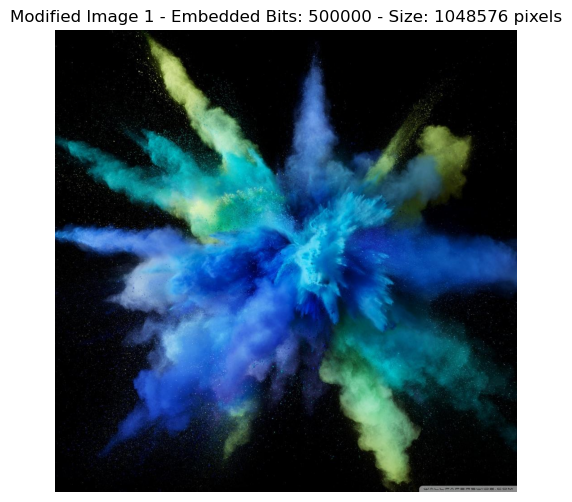

Modified image 2 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\2.jpg


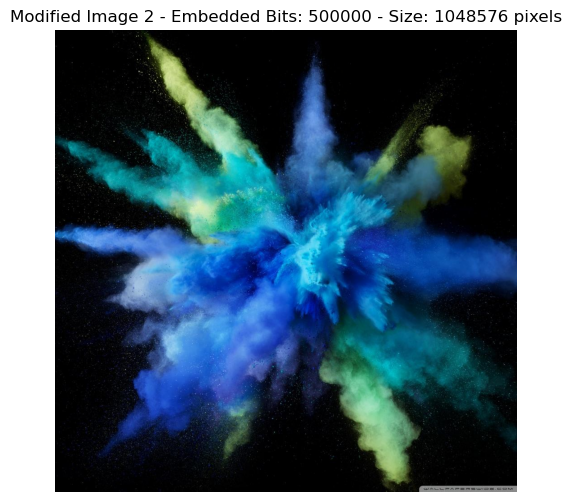

Extracted binary message saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt
SNR (LSB) for Image 1: 49.07 dB
SNR (LSB) for Image 2: 49.06 dB
Average SNR (LSB) across all images: 49.06 dB
Maximum embedding capacity of the cover image: 25165824 bits


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to hide message in LSB of image pixels
def hide_message_LSB(image, binary_message):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Embed message into LSB of each color channel
    for i in range(len(binary_message)):
        bit = int(binary_message[i])
        flattened_image[i][-1] = (flattened_image[i][-1] & 254) | bit
    
    # Reshape the image back to original shape
    modified_image = flattened_image.reshape(image.shape)

    return modified_image

# Function to extract message hidden in LSB of image pixels
def extract_message_LSB(image, message_length):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Extract LSB from each color channel
    extracted_message = []
    for i in range(message_length):
        bit = flattened_image[i][-1] & 1
        extracted_message.append(str(bit))
    
    # Join the bits into a single binary string
    binary_message = ''.join(extracted_message)

    return binary_message

# Function to write binary message to a text file
def write_binary_message_to_file(binary_message, file_path):
    with open(file_path, 'w') as file:
        file.write(binary_message)

# Function to calculate SNR between two images
def calculate_snr(original_image, modified_image):
    # Convert images to float64 to avoid overflow during computations
    original_image = original_image.astype(np.float64)
    modified_image = modified_image.astype(np.float64)
    
    # Calculate signal power
    signal_power = np.sum(original_image ** 2)
    
    # Calculate noise power as the sum of squared differences
    noise = original_image - modified_image
    noise_power = np.sum(noise ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Function to calculate maximum capacity of cover image in terms of bits
def calculate_max_capacity(image):
    total_pixels = image.shape[0] * image.shape[1]
    bits_per_pixel = 3 * 8  # Each pixel has 3 color channels with 8 bits per channel
    max_capacity = total_pixels * bits_per_pixel
    return max_capacity

# Load cover image (RGB)
cover_image_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\cover_image\3.jpg'
cover_image = cv2.imread(cover_image_path)
cover_image = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)

# Load secret message from text file containing binary data
secret_text_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'
with open(secret_text_path, 'r') as file:
    secret_message = file.read().strip()



# Define the chunk size (500,000 bits per image)
chunk_size = 500000

# Split the binary message into two chunks
chunk1 = secret_message[:chunk_size]
chunk2 = secret_message[chunk_size:2 * chunk_size]

# List to store modified images
modified_images = []

# List to store number of bits embedded in each image
bits_embedded = []

# Embed each chunk of the binary message into different images using LSB substitution
for index, chunk in enumerate([chunk1, chunk2]):
    modified_image = hide_message_LSB(cover_image.copy(), chunk)
    modified_images.append(modified_image)
    
    # Save the modified image with sequential names (1.jpg, 2.jpg, ...)
    output_image_path = f'C:\\Users\\Hendy Group\\OneDrive\\Desktop\\final_graduation_project\\folder00\\{index + 1}.jpg'
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))  

    print(f"Modified image {index + 1} saved to: {output_image_path}")

    # Calculate number of bits embedded in this image
    bits_embedded.append(len(chunk))

    # Calculate image size
    image_size = modified_image.shape[0] * modified_image.shape[1]

    # Display the modified image
    plt.figure(figsize=(6, 6))
    plt.title(f"Modified Image {index + 1} - Embedded Bits: {len(chunk)} - Size: {image_size} pixels")
    plt.imshow(modified_image)
    plt.axis('off')
    plt.show()

# Extract hidden message from each modified image
extracted_messages = []
for modified_image in modified_images:
    extracted_message = extract_message_LSB(modified_image, chunk_size)
    extracted_messages.append(extracted_message)

# Combine all extracted chunks into the complete binary message
extracted_message_LSB = ''.join(extracted_messages)

# Write extracted binary message to a text file
extracted_message_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt'
write_binary_message_to_file(extracted_message_LSB, extracted_message_path)
print(f"Extracted binary message saved to: {extracted_message_path}")

# Calculate SNR for each encoded image
snrs = []
for i in range(len(modified_images)):
    snr = calculate_snr(cover_image.astype(np.float64), modified_images[i].astype(np.float64))
    snrs.append(snr)
    print(f"SNR (LSB) for Image {i + 1}: {snr:.2f} dB")

# Calculate average SNR
average_snr = np.mean(snrs)
print(f"Average SNR (LSB) across all images: {average_snr:.2f} dB")

# Calculate and print maximum capacity of the cover image
max_capacity_cover_image = calculate_max_capacity(cover_image)
print(f"Maximum embedding capacity of the cover image: {max_capacity_cover_image} bits")


In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to hide message in LSB of image pixels
def hide_message_LSB(image, binary_message):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Embed message into LSB of each color channel
    for i in range(len(binary_message)):
        bit = int(binary_message[i])
        flattened_image[i][-1] = (flattened_image[i][-1] & 254) | bit
    
    # Reshape the image back to original shape
    modified_image = flattened_image.reshape(image.shape)

    return modified_image

# Function to extract message hidden in LSB of image pixels
def extract_message_LSB(image, message_length):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Extract LSB from each color channel
    extracted_message = []
    for i in range(message_length):
        bit = flattened_image[i][-1] & 1
        extracted_message.append(str(bit))
    
    # Join the bits into a single binary string
    binary_message = ''.join(extracted_message)

    return binary_message

# Function to write binary message to a text file
def write_binary_message_to_file(binary_message, file_path):
    with open(file_path, 'w') as file:
        file.write(binary_message)

# Function to calculate SNR between two images
def calculate_snr(original_image, modified_image):
    # Convert images to float64 to avoid overflow during computations
    original_image = original_image.astype(np.float64)
    modified_image = modified_image.astype(np.float64)
    
    # Calculate signal power
    signal_power = np.sum(original_image ** 2)
    
    # Calculate noise power as the sum of squared differences
    noise = original_image - modified_image
    noise_power = np.sum(noise ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Function to calculate maximum capacity of cover image in terms of bits
def calculate_max_capacity(image):
    total_pixels = image.shape[0] * image.shape[1]
    bits_per_pixel = 3 * 8  # Each pixel has 3 color channels with 8 bits per channel
    max_capacity = total_pixels * bits_per_pixel
    return max_capacity

# Load cover image (RGB)
cover_image_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\cover_image\3.jpg'
cover_image = cv2.imread(cover_image_path)
cover_image = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)

# Load secret message from text file containing binary data
secret_text_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'
with open(secret_text_path, 'r') as file:
    secret_message = file.read().strip()



# Define the chunk size (e.g., 500,000 bits per image)
chunk_size = 500000

# Split the binary message into chunks
num_chunks = len(secret_message) // chunk_size + 1

# List to store modified images
modified_images = []

# Embed each chunk of the binary message into different images using LSB substitution
for index in range(num_chunks):
    start_idx = index * chunk_size
    end_idx = min((index + 1) * chunk_size, len(secret_message))
    chunk = secret_message[start_idx:end_idx]

    modified_image = hide_message_LSB(cover_image.copy(), chunk)
    modified_images.append(modified_image)
    
    # Save the modified image with sequential names (1.jpg, 2.jpg, ...)
    output_image_path = f'C:\\Users\\Hendy Group\\OneDrive\\Desktop\\final_graduation_project\\folder00\\{index + 1}.jpg'
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))  # Save in BGR format for OpenCV compatibility

    print(f"Modified image {index + 1} saved to: {output_image_path}")

# Extract hidden message from each modified image
extracted_messages = []
for index, modified_image in enumerate(modified_images):
    # Calculate number of bits embedded in this image
    bits_embedded = len(secret_message[index * chunk_size:(index + 1) * chunk_size])

    # Only extract message if bits were actually embedded
    if bits_embedded > 0:
        extracted_message = extract_message_LSB(modified_image, bits_embedded)
        extracted_messages.append(extracted_message)
    else:
        print(f"No embedded message found in Modified image {index + 1}")

# Combine all extracted chunks into the complete binary message
extracted_message_LSB = ''.join(extracted_messages)

# Write extracted binary message to a text file
extracted_message_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt'
write_binary_message_to_file(extracted_message_LSB, extracted_message_path)
print(f"Extracted binary message saved to: {extracted_message_path}")

# Calculate SNR for each encoded image
snrs = []
for i in range(len(modified_images)):
    snr = calculate_snr(cover_image.astype(np.float64), modified_images[i].astype(np.float64))
    snrs.append(snr)
    print(f"SNR (LSB) for Image {i + 1}: {snr:.2f} dB")

# Calculate average SNR
average_snr = np.mean(snrs)
print(f"Average SNR (LSB) across all images: {average_snr:.2f} dB")

# Calculate and print maximum capacity of the cover image
max_capacity_cover_image = calculate_max_capacity(cover_image)
print(f"Maximum embedding capacity of the cover image: {max_capacity_cover_image} bits")


Modified image 1 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\1.jpg
Modified image 2 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\2.jpg
Modified image 3 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\3.jpg
No embedded message found in Modified image 3
Extracted binary message saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt
SNR (LSB) for Image 1: 49.07 dB
SNR (LSB) for Image 2: 49.06 dB
SNR (LSB) for Image 3: inf dB
Average SNR (LSB) across all images: inf dB
Maximum embedding capacity of the cover image: 25165824 bits


C:\Users\Hendy Group\AppData\Local\Temp\ipykernel_5176\3543504291.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


In [32]:
def bin_to_text_binary(bin_file_path, text_file_path):
    """
    Converts a binary file to a text file with binary (0s and 1s) representation.

    :param bin_file_path: Path to the input binary file.
    :param text_file_path: Path to the output text file.
    """
    try:
        with open(bin_file_path, 'rb') as bin_file:
            binary_content = bin_file.read()
        
        # Convert binary content to a string of 0s and 1s
        binary_string = ''.join(format(byte, '08b') for byte in binary_content)

        with open(text_file_path, 'w') as text_file:
            text_file.write(binary_string)

        print(f"Successfully converted {bin_file_path} to {text_file_path}")

    except Exception as e:
        print(f"Error: {e}")

# Define paths
bin_file_path = r"C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\output_binary_file.bin"
text_file_path = r"C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\input_bits.txt"

# Convert the binary file to a text file with binary representation
bin_to_text_binary(bin_file_path, text_file_path)


Successfully converted C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\output_binary_file.bin to C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\input_bits.txt


In [36]:
def text_to_bin(text_file_path, bin_file_path):
    try:
        with open(text_file_path, 'r') as text_file:
            binary_string = text_file.read().strip()
        
        # Ensure the binary string length is a multiple of 8
        if len(binary_string) % 8 != 0:
            raise ValueError("The binary string length must be a multiple of 8.")

        # Convert the binary string to bytes
        byte_array = bytearray(int(binary_string[i:i+8], 2) for i in range(0, len(binary_string), 8))

        with open(bin_file_path, 'wb') as bin_file:
            bin_file.write(byte_array)

        print(f"Successfully converted {text_file_path} to {bin_file_path}")

    except Exception as e:
        print(f"Error: {e}")

# Define paths
text_file_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt'
bin_file_path = r"C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\restored_input.bin"

# Convert the text file with binary representation to a binary file
text_to_bin(text_file_path, bin_file_path)


Successfully converted C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt to C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\restored_input.bin


In [37]:
def compare_binary_files(file1_path, file2_path):
    """
    Compare two binary files to determine if they are identical.
    
    :param file1_path: Path to the first binary file.
    :param file2_path: Path to the second binary file.
    :return: True if files are identical, False otherwise.
    """
    # Open both files in binary mode
    with open(file1_path, 'rb') as file1, open(file2_path, 'rb') as file2:
        # Read the entire contents of the files
        content1 = file1.read()
        content2 = file2.read()
    
    # Compare the contents
    if content1 == content2:
        return True
    else:
        return False

# Example usage
file1_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\restored_input.bin'
file2_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\output_binary_file.bin'

are_same = compare_binary_files(file1_path, file2_path)

if are_same:
    print("The binary files are identical.")
else:
    print("The binary files are different.")


The binary files are identical.


Modified image 1 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\1.jpg
Modified image 2 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\2.jpg
Modified image 3 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\3.jpg
Modified image 4 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\4.jpg
Modified image 5 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\5.jpg
Modified image 6 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\6.jpg
Modified image 7 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\7.jpg
Modified image 8 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\8.jpg
Modified image 9 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\9.jpg
Modified image 10 saved to: C:\Users\Hendy Group\OneDri

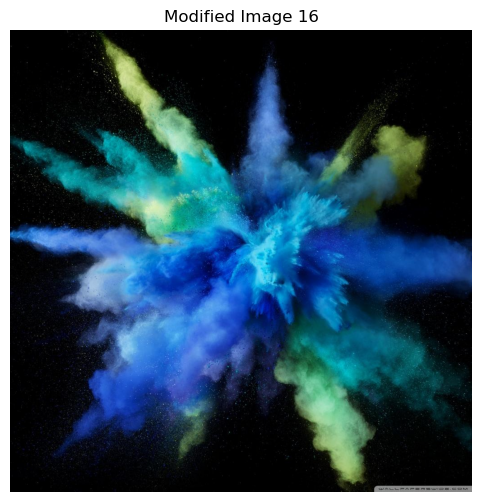

Extracted binary message saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message3.txt
SNR (LSB) for Image 1: 46.06 dB
SNR (LSB) for Image 2: 46.05 dB
SNR (LSB) for Image 3: 46.05 dB
SNR (LSB) for Image 4: 46.05 dB
SNR (LSB) for Image 5: 46.05 dB
SNR (LSB) for Image 6: 46.05 dB
SNR (LSB) for Image 7: 46.05 dB
SNR (LSB) for Image 8: 46.05 dB
SNR (LSB) for Image 9: 46.05 dB
SNR (LSB) for Image 10: 46.04 dB
SNR (LSB) for Image 11: 46.05 dB
SNR (LSB) for Image 12: 46.05 dB
SNR (LSB) for Image 13: 46.04 dB
SNR (LSB) for Image 14: 46.05 dB
SNR (LSB) for Image 15: 46.05 dB
Average SNR (LSB) across all images: 46.05 dB


In [25]:
'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to hide message in LSB of image pixels
def hide_message_LSB(image, binary_message):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Embed message into LSB of each color channel
    for i in range(len(binary_message)):
        bit = int(binary_message[i])
        flattened_image[i][-1] = (flattened_image[i][-1] & 254) | bit
    
    # Reshape the image back to original shape
    modified_image = flattened_image.reshape(image.shape)

    return modified_image

# Function to extract message hidden in LSB of image pixels
def extract_message_LSB(image, message_length):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Extract LSB from each color channel
    extracted_message = []
    for i in range(message_length):
        bit = flattened_image[i][-1] & 1
        extracted_message.append(str(bit))
    
    # Join the bits into a single binary string
    binary_message = ''.join(extracted_message)

    return binary_message

# Function to write binary message to a text file
def write_binary_message_to_file(binary_message, file_path):
    with open(file_path, 'w') as file:
        file.write(binary_message)

# Function to calculate SNR between two images
def calculate_snr(original_image, modified_image):
    # Convert images to float64 to avoid overflow during computations
    original_image = original_image.astype(np.float64)
    modified_image = modified_image.astype(np.float64)
    
    # Calculate signal power
    signal_power = np.sum(original_image ** 2)
    
    # Calculate noise power as the sum of squared differences
    noise = original_image - modified_image
    noise_power = np.sum(noise ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Load cover image (RGB)
cover_image_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\cover_image\3.jpg'
cover_image = cv2.imread(cover_image_path)
cover_image = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)

# Load secret message from text file containing binary data
secret_text_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'
with open(secret_text_path, 'r') as file:
    secret_message = file.read().strip()



# Define the chunk size (500,000 bits per image)
chunk_size = 1000000

# Calculate how many full chunks and the remaining bits
num_full_chunks = len(secret_message) // chunk_size
remaining_bits = len(secret_message) % chunk_size

# List to store modified images
modified_images = []

# Embed each full chunk of the binary message into different images using LSB substitution
for index in range(num_full_chunks):
    chunk = secret_message[index * chunk_size : (index + 1) * chunk_size]
    modified_image = hide_message_LSB(cover_image.copy(), chunk)
    modified_images.append(modified_image)
    
    # Save the modified image with sequential names (1.jpg, 2.jpg, ...)
    output_image_path = f'C:\\Users\\Hendy Group\\OneDrive\\Desktop\\final_graduation_project\\folder00\\{index + 1}.jpg'
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))  # Save in BGR format for OpenCV compatibility

    print(f"Modified image {index + 1} saved to: {output_image_path}")

# Handle the remaining bits
if remaining_bits > 0:
    last_chunk = secret_message[num_full_chunks * chunk_size :]
    modified_image = hide_message_LSB(cover_image.copy(), last_chunk)
    modified_images.append(modified_image)
    
    # Save the modified image with a sequential name
    output_image_path = f'C:\\Users\\Hendy Group\\OneDrive\\Desktop\\final_graduation_project\\folder00\\{num_full_chunks + 1}.jpg'
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))  # Save in BGR format for OpenCV compatibility

    print(f"Modified image {num_full_chunks + 1} saved to: {output_image_path}")

# Display results for the last modified image (just for visualization)
plt.figure(figsize=(6, 6))
plt.title(f"Modified Image {num_full_chunks + 1}")
plt.imshow(modified_images[-1])
plt.axis('off')
plt.show()

# Extract hidden message from each modified image
extracted_messages = []
for modified_image in modified_images:
    if len(extracted_messages) < num_full_chunks:
        extracted_message = extract_message_LSB(modified_image, chunk_size)
    else:
        extracted_message = extract_message_LSB(modified_image, remaining_bits)
    extracted_messages.append(extracted_message)

# Combine all extracted chunks into the complete binary message
extracted_message_LSB = ''.join(extracted_messages)

# Write extracted binary message to a text file
extracted_message_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message3.txt'
write_binary_message_to_file(extracted_message_LSB, extracted_message_path)
print(f"Extracted binary message saved to: {extracted_message_path}")

# Calculate SNR for each encoded image
snrs = []
for i in range(len(modified_images)):
    snr = calculate_snr(cover_image.astype(np.float64), modified_images[i].astype(np.float64))
    snrs.append(snr)
    print(f"SNR (LSB) for Image {i + 1}: {snr:.2f} dB")

# Calculate average SNR
average_snr = np.mean(snrs)
print(f"Average SNR (LSB) across all images: {average_snr:.2f} dB")
'''

Modified image 1 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\1.jpg
Modified image 2 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\2.jpg
Modified image 3 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\3.jpg
Modified image 4 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\4.jpg


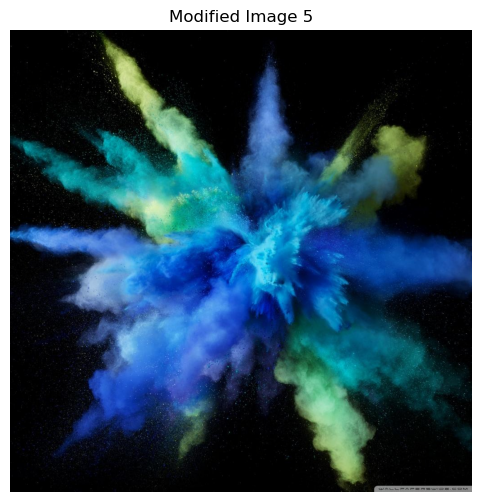

Extracted binary message saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt
SNR (LSB) for Image 1: 46.05 dB
SNR (LSB) for Image 2: 46.05 dB
SNR (LSB) for Image 3: 46.05 dB
SNR (LSB) for Image 4: 46.06 dB
Average SNR (LSB) across all images: 46.05 dB
Maximum embedding capacity of the cover image: 3145728 bits


In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Function to hide message in LSB of image pixels
def hide_message_LSB(image, binary_message):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Embed message into LSB of each color channel
    for i in range(len(binary_message)):
        bit = int(binary_message[i])
        flattened_image[i][-1] = (flattened_image[i][-1] & 254) | bit
    
    # Reshape the image back to original shape
    modified_image = flattened_image.reshape(image.shape)

    return modified_image

# Function to extract message hidden in LSB of image pixels
def extract_message_LSB(image, message_length):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Extract LSB from each color channel
    extracted_message = []
    for i in range(message_length):
        bit = flattened_image[i][-1] & 1
        extracted_message.append(str(bit))
    
    # Join the bits into a single binary string
    binary_message = ''.join(extracted_message)

    return binary_message

# Function to write binary message to a text file
def write_binary_message_to_file(binary_message, file_path):
    with open(file_path, 'w') as file:
        file.write(binary_message)

# Function to calculate SNR between two images
def calculate_snr(original_image, modified_image):
    # Convert images to float64 to avoid overflow during computations
    original_image = original_image.astype(np.float64)
    modified_image = modified_image.astype(np.float64)
    
    # Calculate signal power
    signal_power = np.sum(original_image ** 2)
    
    # Calculate noise power as the sum of squared differences
    noise = original_image - modified_image
    noise_power = np.sum(noise ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Function to calculate maximum embedding capacity of the cover image
def calculate_max_capacity(image):
    # Calculate number of pixels
    num_pixels = np.prod(image.shape[:2])

    # Each pixel has 3 color channels (RGB), each channel can store 1 bit in LSB
    max_capacity = num_pixels * 3
    
    return max_capacity

# Load cover image (RGB)
cover_image_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\cover_image\3.jpg'
cover_image = cv2.imread(cover_image_path)
cover_image = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)

# Load secret message from text file containing binary data
secret_text_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'
with open(secret_text_path, 'r') as file:
    secret_message = file.read().strip()

chunk_size = 1000000

# Calculate how many full chunks and the remaining bits
num_full_chunks = len(secret_message) // chunk_size
remaining_bits = len(secret_message) % chunk_size

# List to store modified images
modified_images = []

# List to store number of bits embedded in each image
bits_embedded = []

# Embed each full chunk of the binary message into different images using LSB substitution
for index in range(num_full_chunks):
    chunk = secret_message[index * chunk_size : (index + 1) * chunk_size]
    
    modified_image = hide_message_LSB(cover_image.copy(), chunk)
    
    modified_images.append(modified_image)
    bits_embedded.append(len(chunk))
    
    # Save the modified image with sequential names (1.jpg, 2.jpg, ...)
    output_image_path = f'C:\\Users\\Hendy Group\\OneDrive\\Desktop\\final_graduation_project\\folder00\\{index + 1}.jpg'
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))  # Save in BGR format for OpenCV compatibility

    print(f"Modified image {index + 1} saved to: {output_image_path}")

# Handle the remaining bits
if remaining_bits > 0:
    last_chunk = secret_message[num_full_chunks * chunk_size :]
    
    modified_image = hide_message_LSB(cover_image.copy(), last_chunk)
    
    modified_images.append(modified_image)
    bits_embedded.append(len(last_chunk))
    
    # Save the modified image with a sequential name
    output_image_path = f'C:\\Users\\Hendy Group\\OneDrive\\Desktop\\final_graduation_project\\folder00\\{num_full_chunks + 1}.jpg'
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))  # Save in BGR format for OpenCV compatibility

    print(f"Modified image {num_full_chunks + 1} saved to: {output_image_path}")

# Display results for the last modified image (just for visualization)
plt.figure(figsize=(6, 6))
plt.title(f"Modified Image {num_full_chunks + 1}")
plt.imshow(modified_images[-1])
plt.axis('off')
plt.show()

# Extract hidden message from each modified image
extracted_messages = []
for modified_image in modified_images:
    if len(extracted_messages) < num_full_chunks:
        extracted_message = extract_message_LSB(modified_image, chunk_size)
    else:
        extracted_message = extract_message_LSB(modified_image, remaining_bits)
    extracted_messages.append(extracted_message)

# Combine all extracted chunks into the complete binary message
extracted_message_LSB = ''.join(extracted_messages)

# Write extracted binary message to a text file
extracted_message_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt'
write_binary_message_to_file(extracted_message_LSB, extracted_message_path)
print(f"Extracted binary message saved to: {extracted_message_path}")

# Calculate SNR for each encoded image
snrs = []
for i in range(len(modified_images)):
    snr = calculate_snr(cover_image.astype(np.float64), modified_images[i].astype(np.float64))
    snrs.append(snr)
    print(f"SNR (LSB) for Image {i + 1}: {snr:.2f} dB")

# Calculate average SNR
average_snr = np.mean(snrs)
print(f"Average SNR (LSB) across all images: {average_snr:.2f} dB")

# Calculate maximum embedding capacity of the cover image
max_capacity = calculate_max_capacity(cover_image)
print(f"Maximum embedding capacity of the cover image: {max_capacity} bits")


In [19]:
import cv2
import numpy as np
import os

# Function to hide message in LSB of image pixels
def hide_message_LSB(image, binary_message):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Embed message into LSB of each color channel
    for i in range(len(binary_message)):
        bit = int(binary_message[i])
        flattened_image[i][-1] = (flattened_image[i][-1] & 254) | bit
    
    # Reshape the image back to original shape
    modified_image = flattened_image.reshape(image.shape)

    return modified_image

# Function to extract message hidden in LSB of image pixels
def extract_message_LSB(image, message_length):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Extract LSB from each color channel
    extracted_message = []
    for i in range(message_length):
        bit = flattened_image[i][-1] & 1
        extracted_message.append(str(bit))
    
    # Join the bits into a single binary string
    binary_message = ''.join(extracted_message)

    return binary_message

# Function to write binary message to a text file
def write_binary_message_to_file(binary_message, file_path):
    with open(file_path, 'w') as file:
        file.write(binary_message)

# Function to calculate SNR between two images
def calculate_snr(original_image, modified_image):
    # Convert images to float64 to avoid overflow during computations
    original_image = original_image.astype(np.float64)
    modified_image = modified_image.astype(np.float64)
    
    # Calculate signal power
    signal_power = np.sum(original_image ** 2)
    
    # Calculate noise power as the sum of squared differences
    noise = original_image - modified_image
    noise_power = np.sum(noise ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Function to calculate maximum embedding capacity of the cover image
def calculate_max_capacity(image):
    return image.size // 8

# Paths for input files and directories
binary_message_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'
cover_image_dir = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\cover_image'
output_dir = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00'

# Read binary data from text file
with open(binary_message_path, 'r') as file:
    binary_message = file.read()

# Determine the number of cover images needed
cover_image_files = sorted([os.path.join(cover_image_dir, f) for f in os.listdir(cover_image_dir) if f.endswith('.jpg')])
num_cover_images = len(cover_image_files)

# Load the first cover image to get its dimensions
cover_image = cv2.imread(cover_image_files[0])
cover_image_rgb = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)
max_capacity = calculate_max_capacity(cover_image_rgb)

# Split binary message into chunks
chunk_size = 1000000
binary_message_chunks = [binary_message[i:i + chunk_size] for i in range(0, len(binary_message), chunk_size)]
num_full_chunks = len(binary_message_chunks)

# Embed each chunk into a separate cover image
modified_images = []
for i, chunk in enumerate(binary_message_chunks):
    cover_image = cv2.imread(cover_image_files[i])
    cover_image_rgb = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)
    modified_image = hide_message_LSB(cover_image_rgb, chunk)
    modified_images.append(modified_image)
    
    # Save the modified image with a sequential name
    output_image_path = os.path.join(output_dir, f'modified_{i + 1}.jpg')
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))
    print(f"Modified image {i + 1} saved to: {output_image_path}")

# Extract hidden message from each modified image
extracted_messages = []
for i, modified_image in enumerate(modified_images):
    chunk_size = len(binary_message_chunks[i])
    extracted_message = extract_message_LSB(modified_image, chunk_size)
    extracted_messages.append(extracted_message)

# Combine all extracted chunks into the complete binary message
extracted_message_LSB = ''.join(extracted_messages)

# Write extracted binary message to a text file
extracted_message_path = os.path.join(output_dir, 'extracted_message.txt')
write_binary_message_to_file(extracted_message_LSB, extracted_message_path)
print(f"Extracted binary message saved to: {extracted_message_path}")

# Calculate SNR for each encoded image
snrs = []
for i in range(len(modified_images)):
    cover_image = cv2.imread(cover_image_files[i])
    cover_image_rgb = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)
    snr = calculate_snr(cover_image_rgb.astype(np.float64), modified_images[i].astype(np.float64))
    snrs.append(snr)
    print(f"SNR (LSB) for Image {i + 1}: {snr:.2f} dB")

# Calculate average SNR
average_snr = np.mean(snrs)
print(f"Average SNR (LSB) across all images: {average_snr:.2f} dB")

# Calculate maximum embedding capacity of the cover image
print(f"Maximum embedding capacity of a cover image: {max_capacity} bits")


Modified image 1 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_1.jpg
Modified image 2 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_2.jpg
Modified image 3 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_3.jpg
Modified image 4 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_4.jpg


IndexError: list index out of range

In [20]:
import cv2
import numpy as np
import os

# Function to hide message in LSB of image pixels
def hide_message_LSB(image, binary_message):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Embed message into LSB of each color channel
    for i in range(len(binary_message)):
        bit = int(binary_message[i])
        flattened_image[i][-1] = (flattened_image[i][-1] & 254) | bit
    
    # Reshape the image back to original shape
    modified_image = flattened_image.reshape(image.shape)

    return modified_image

# Function to extract message hidden in LSB of image pixels
def extract_message_LSB(image, message_length):
    # Flatten image pixel values
    flattened_image = image.reshape((-1, 3))

    # Extract LSB from each color channel
    extracted_message = []
    for i in range(message_length):
        bit = flattened_image[i][-1] & 1
        extracted_message.append(str(bit))
    
    # Join the bits into a single binary string
    binary_message = ''.join(extracted_message)

    return binary_message

# Function to write binary message to a text file
def write_binary_message_to_file(binary_message, file_path):
    with open(file_path, 'w') as file:
        file.write(binary_message)

# Function to calculate SNR between two images
def calculate_snr(original_image, modified_image):
    # Convert images to float64 to avoid overflow during computations
    original_image = original_image.astype(np.float64)
    modified_image = modified_image.astype(np.float64)
    
    # Calculate signal power
    signal_power = np.sum(original_image ** 2)
    
    # Calculate noise power as the sum of squared differences
    noise = original_image - modified_image
    noise_power = np.sum(noise ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    
    return snr

# Function to calculate maximum embedding capacity of the cover image
def calculate_max_capacity(image):
    return image.size // 8

# Paths for input files and directories
binary_message_path = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\random_bits.txt'
cover_image_dir = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\cover_image'
output_dir = r'C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00'

# Read binary data from text file
with open(binary_message_path, 'r') as file:
    binary_message = file.read()

# Determine the number of cover images needed
cover_image_files = sorted([os.path.join(cover_image_dir, f) for f in os.listdir(cover_image_dir) if f.endswith('.jpg')])
num_cover_images = len(cover_image_files)

# Load the first cover image to get its dimensions
cover_image = cv2.imread(cover_image_files[0])
cover_image_rgb = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)
max_capacity = calculate_max_capacity(cover_image_rgb)

# Split binary message into chunks
chunk_size = 1000000
binary_message_chunks = [binary_message[i:i + chunk_size] for i in range(0, len(binary_message), chunk_size)]
num_full_chunks = len(binary_message_chunks)

# Embed each chunk into a separate cover image
modified_images = []
for j, chunk in enumerate(binary_message_chunks):
    # Determine the current cover image index using modulo operation
    i = j % num_cover_images
    
    # Load the current cover image
    cover_image = cv2.imread(cover_image_files[i])
    cover_image_rgb = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)
    
    # Embed the message chunk into the current cover image
    modified_image = hide_message_LSB(cover_image_rgb, chunk)
    modified_images.append(modified_image)
    
    # Save the modified image with a sequential name
    output_image_path = os.path.join(output_dir, f'modified_{j + 1}.jpg')
    cv2.imwrite(output_image_path, cv2.cvtColor(modified_image, cv2.COLOR_RGB2BGR))
    print(f"Modified image {j + 1} saved to: {output_image_path}")

# Extract hidden message from each modified image
extracted_messages = []
for j, modified_image in enumerate(modified_images):
    # Determine the current cover image index using modulo operation
    i = j % num_cover_images
    
    chunk_size = len(binary_message_chunks[j])
    extracted_message = extract_message_LSB(modified_image, chunk_size)
    extracted_messages.append(extracted_message)

# Combine all extracted chunks into the complete binary message
extracted_message_LSB = ''.join(extracted_messages)

# Write extracted binary message to a text file
extracted_message_path = os.path.join(output_dir, 'extracted_message.txt')
write_binary_message_to_file(extracted_message_LSB, extracted_message_path)
print(f"Extracted binary message saved to: {extracted_message_path}")

# Calculate SNR for each encoded image
snrs = []
for j in range(len(modified_images)):
    # Determine the current cover image index using modulo operation
    i = j % num_cover_images
    
    cover_image = cv2.imread(cover_image_files[i])
    cover_image_rgb = cv2.cvtColor(cover_image, cv2.COLOR_BGR2RGB)
    
    snr = calculate_snr(cover_image_rgb.astype(np.float64), modified_images[j].astype(np.float64))
    snrs.append(snr)
    print(f"SNR (LSB) for Image {j + 1}: {snr:.2f} dB")

# Calculate average SNR
average_snr = np.mean(snrs)
print(f"Average SNR (LSB) across all images: {average_snr:.2f} dB")

# Calculate maximum embedding capacity of the cover image
print(f"Maximum embedding capacity of a cover image: {max_capacity} bits")


Modified image 1 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_1.jpg
Modified image 2 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_2.jpg
Modified image 3 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_3.jpg
Modified image 4 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_4.jpg
Modified image 5 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_5.jpg
Modified image 6 saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\modified_6.jpg
Extracted binary message saved to: C:\Users\Hendy Group\OneDrive\Desktop\final_graduation_project\folder00\extracted_message.txt
SNR (LSB) for Image 1: 50.28 dB
SNR (LSB) for Image 2: 49.95 dB
SNR (LSB) for Image 3: 46.06 dB
SNR (LSB) for Image 4: 43.90 dB
SNR (LSB) for Image 5: 50.28 dB
SNR (LSB) for Image 6: 49.9